$
\newcommand{\RR}{\mathbf{R}}
\newcommand{\ZZ}{\mathbf{Z}}
\newcommand{\NN}{\mathbf{N}}
\newcommand{\e}{\mathrm{e}}
\newcommand{\eps}{\varepsilon}
$

# HW 2

Submitted 2/17/18 by Colton Grainger for Math-428: Numerical Methods, Spring 2018, UIdaho Engineering Outreach.

## Taylor Polynomials
### prob 1

Consider the function $f(x)=\cos(\pi x/2)$.

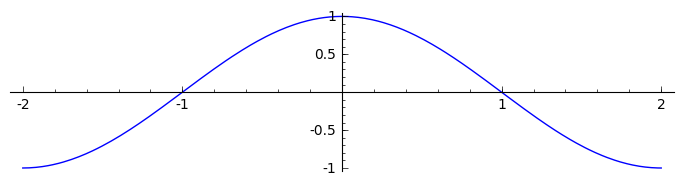

In [2]:
f = cos(pi*x/2)
p = f.plot((x, -2, 2))
p.show(figsize = [7, 2])

We expand $f(x)$ in a Taylor series about the point $x_0=0$.

Since (about $x = 0$)
$$
\cos x = \sum^{\infty}_{n=0} \frac{(-1)^n}{(2n)!} x^{2n} =  1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \cdots
$$
our Taylor expansion is just

In [13]:
f.series(x, 8)

1 + (-1/8*pi^2)*x^2 + (1/384*pi^4)*x^4 + (-1/46080*pi^6)*x^6 + Order(x^8)

In [3]:
# here's the 6th degree Taylor polynomial
f.taylor(x, 0, 6)

-1/46080*pi^6*x^6 + 1/384*pi^4*x^4 - 1/8*pi^2*x^2 + 1

We find an expression for the remainder $R_n = f - P_n$ between the function $f$ and its $n$th degree Taylor $P_n$ polynomial.

By Taylor's theorem, there exists an $\xi(x)$ between $x$ and the origin such that
$$
R_n(x) = \frac{x^{n+1}}{(n+1)!}f^{(n+1)}(\xi).
$$

Since $f(x) = \cos\frac\pi2 x$, we can express derivatives as 
$$
f^{(k)}(x) = (\pi/2)^k\cos\left(\frac\pi2(x + k)\right)
$$

In [46]:
# some evidence for the claim
for k in range(4):
    error(x) = f.diff(x, k) - (pi/2)^k*cos((pi/2)*(x + k))
    print bool(error == 0)

True
True
True
True


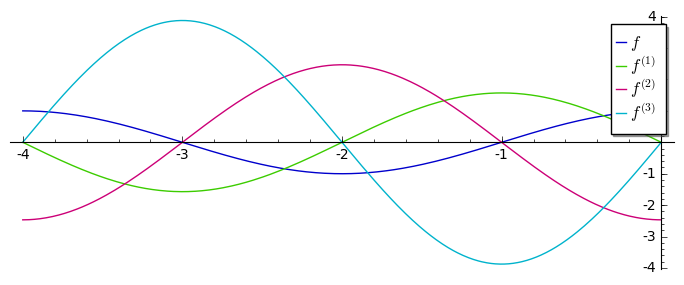

In [47]:
# and graphically, we see differentiation is just translation and scaling
plot([f.diff(x, k) for k in range(4)], (x, -4, 0), 
     legend_label = ['$f$','$f^{(1)}$', '$f^{(2)}$', '$f^{(3)}$'],
     figsize = [7,3])

Whence 
$$
R_n(x) = \frac{x^{n+1}}{(n+1)!}(\pi/2)^{(n+1)}\cos\left(\frac\pi2(\xi + n + 1)\right) \quad \text{for some $\xi$ between $x$ and the origin.}
$$

We estimate the number of terms required to guarantee <!---six-significant-digit---> 
accuracy for $f(x)$ within $10^{-5}$  for all $x$ in the interval $[-1, 1]$.

The error $\left|P_n(x) - f\right|$ is just $\left|R_n(x)\right|$.

Since $\cos \colon \RR \to [-1,1]$, for whatever $\xi$, we have the inequality 
$$
\left|R_n(x)\right| \leq \left|\frac{x^{n+1}}{(n+1)!}(\pi/2)^{(n+1)}\right|.
$$

Further, we notice 
$$ 
\max_{\substack{x \in [-1, 1]}} \left|\frac{x^{n+1}}{(n+1)!}(\pi/2)^{(n+1)}\right| = \frac{(\pi/2)^{(n+1)}}{(n+1)!}.
$$
which is our desired error bound. 

To find $n$ such that $\left|R_n(x)\right| \leq \eps$ with $\eps = 10^{-5}$, we iterate.

In [54]:
from math import factorial

n = 0; eps = 10**(-5)
error_bound = lambda n : ((pi/2)**(n+1))/factorial(n+1)

while error_bound(N) > eps:
    n += 1
n

0

We plot $f(x)$ and its 1st, 3rd, 5th and 7th degree Taylor polynomials over $[-2, 2]$.

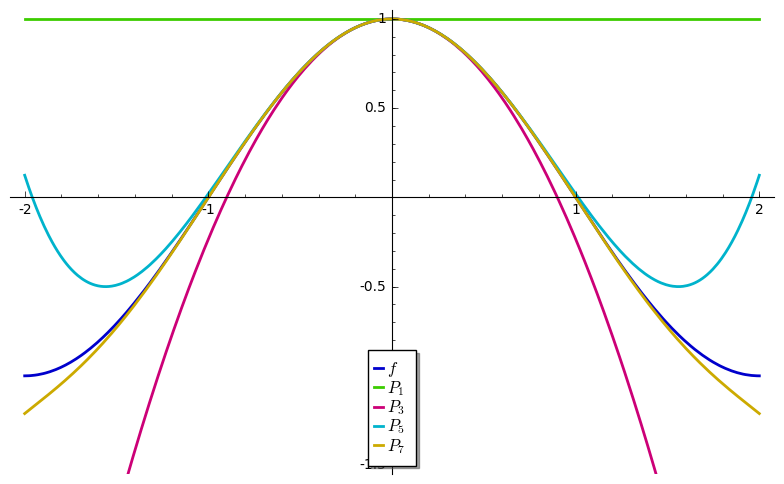

In [18]:
curves = [f] + [f.taylor(x,0,i) for i in [1,3,5,7]]
p = plot(curves, (x,-2,2), 
         legend_label = ['$f$','$P_1$', '$P_3$', '$P_5$', '$P_7$'],
         thickness = 2.0)
p.show(ymin = -1.5, figsize = [8,5])

### prob 2

We define a fixed point iteration function, which returns a list with 2 entries
- a list of the first so many terms in the fixed point iteration sequence
- the last term before the function halts fixed point iteration

In [11]:
def fixedpt(g, approx, eps, Nmax, SAVELIST = True):
    i=0; previous = float("inf"); seq = [approx]
    while abs(approx - previous) > eps and i < Nmax:
        previous = approx
        approx = g(x=approx)
        i += 1
        if SAVELIST:
            seq = seq + [approx]
    return [seq, N(approx)]

We'll consider a few fixed point iteration schemes. Each of the following functions $g$ have a fixed point $\alpha$. But which converge to $\alpha$ (provided $|x_0-\alpha|$ is sufficiently small)? (For discussion on *writing* such an iterator function, see [fixed point iteration: finding g(x)](https://math.stackexchange.com/questions/2053965/fixed-point-iteration-finding-gx?rq=1) on Stack Exchange.)

If it does converge, we'll give the
order of convergence; for linear convergence, give the rate of
linear convergence (i.e., the asymptotic constant).  In the case
that $g^{\prime}(\alpha)=0$, we'll expand $g(x)$ in a Taylor
polynomial about $x=\alpha$ to determine the order of convergence. 

### prob 2 (a)

Consider the fixed point iteration (to find $\alpha=2$).
$$x_{n+1}=-16+6x_n+\frac{12}{x_n}$$

In [29]:
g = -16 + 6*x + 12/x
approx=2.1; eps=10^(-15); Nmax=10
fixedpt(g, approx, eps, Nmax)

[[2.10000000000000,
  2.31428571428571,
  3.07089947089947,
  6.33304672201985,
  23.8931029233178,
  127.860854525974,
  751.258979179941,
  4491.56984826643,
  26933.4217612703,
  161584.531013165,
  969491.186153253],
 969491.186153253]

Starting with $x_0= 2.1$, this iteration scheme diverges, as evinced by the above sequence of values and the following graphs.

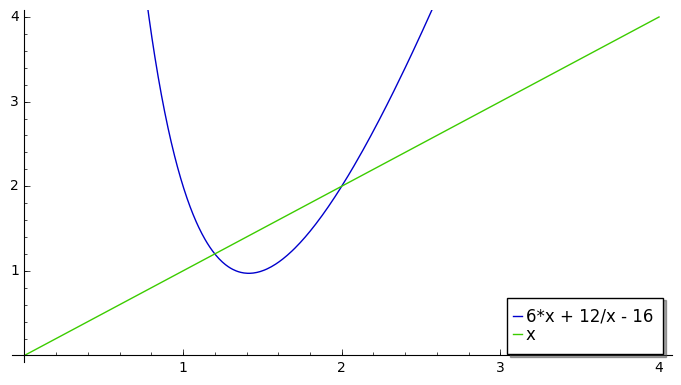

In [57]:
A = plot([g, x], (x, 0, 4), ymin=0, ymax=4, legend_label = 'automatic')
show(A, figsize = [7,4])

We'll generate [cobweb plots](https://en.wikipedia.org/wiki/Cobweb_plot) to get some intuition as to why these iterations diverge.

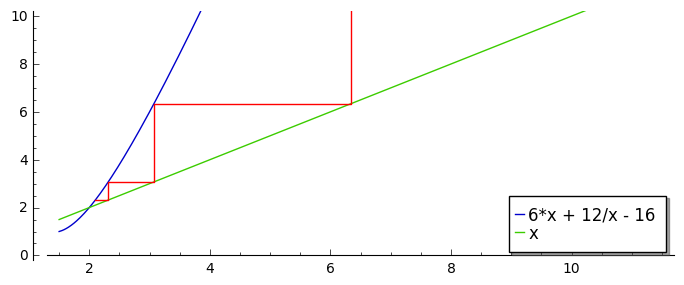

In [107]:
approx=2.1; eps=10^(-15); Nmax=10

seq = fixedpt(g, approx, eps, Nmax)[0]
points = []
for i in range(Nmax):
    points.append((seq[i], seq[i+1]))
    points.append((seq[i+1], seq[i+1]))

h = 10
A = plot([g, x], xmin=1.5, xmax=1.5+h, ymin = 0, ymax = h, legend_label = 'automatic') 
B = list_plot(points, xmin=1.5, xmax=1.5+h, ymin = 0, ymax = h, plotjoined = True, color = 'red')
show(A+B, figsize = [7,3])

We can also try the iteration scheme from just below $\alpha$; this sequence also diverges.

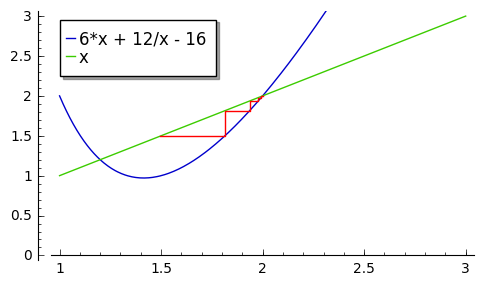

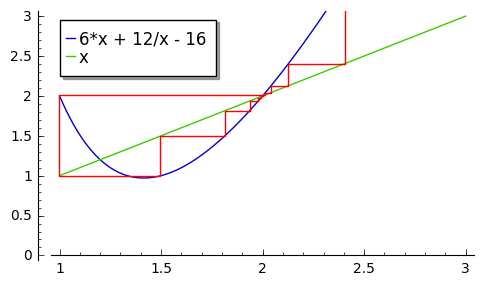

In [123]:
approx=1.99999; eps=10^(-15); Nmax=10

seq = fixedpt(g, approx, eps, Nmax)[0]
points = []
for i in range(Nmax):
    points.append((seq[i], seq[i+1]))
    points.append((seq[i+1], seq[i+1]))

h = 1
A = plot([g, x], xmin=2-h, xmax=2+h, ymin = 0, ymax = 2+h, legend_label = 'automatic') 
B = list_plot(points, xmin=2-h, xmax=2+h, ymin = 0, ymax = 2+h, plotjoined = True, color = 'red')
show(A+B, figsize = [5,3])

approx=1.99999; eps=10^(-15); Nmax=25

seq = fixedpt(g, approx, eps, Nmax)[0]
points = []
for i in range(Nmax):
    points.append((seq[i], seq[i+1]))
    points.append((seq[i+1], seq[i+1]))

h = 1
A = plot([g, x], xmin=2-h, xmax=2+h, ymin = 0, ymax = 2+h, legend_label = 'automatic') 
B = list_plot(points, xmin=2-h, xmax=2+h, ymin = 0, ymax = 2+h, plotjoined = True, color = 'red')
show(A+B, figsize = [5,3])

Additionally, we consider the other fixed point $1.2$ (from below and from above); it seems the graph of $g$ is *too steep* for convergence.

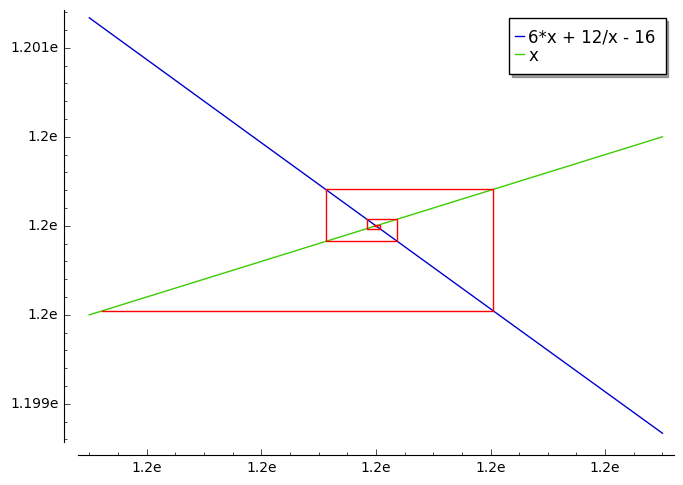

In [126]:
#below
approx=1.1999999; eps=10^(-15); Nmax=10
seq = fixedpt(g, approx, eps, Nmax)[0]
points = []
for i in range(Nmax):
    points.append((seq[i], seq[i+1]))
    points.append((seq[i+1], seq[i+1]))

h = 0.5*10^(-3)
A = plot([g, x], (x, 1.2-h, 1.2+h), legend_label = 'automatic')
B = list_plot(points, plotjoined = True, color = 'red')
show(A+B, figsize = [7,5])

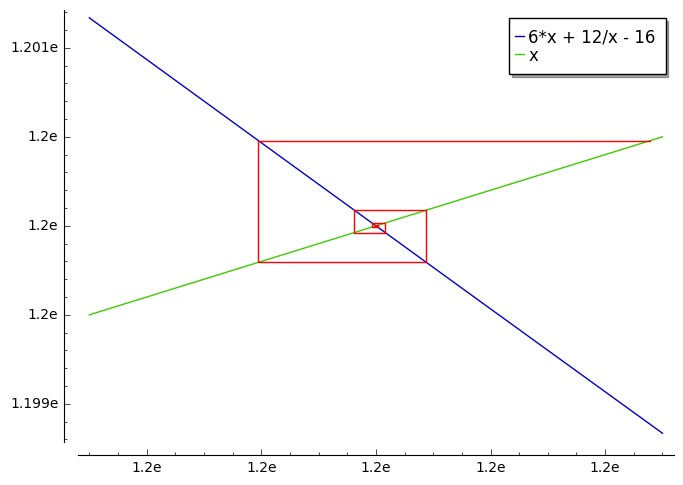

In [124]:
# from above
approx=1.2000001; eps=10^(-15); Nmax=10
seq = fixedpt(g, approx, eps, Nmax)[0]
points = []
for i in range(Nmax):
    points.append((seq[i], seq[i+1]))
    points.append((seq[i+1], seq[i+1]))

h = 0.5*10^(-3)
A = plot([g, x], (x, 1.2-h, 1.2+h), legend_label = 'automatic')
B = list_plot(points, plotjoined = True, color = 'red')
show(A+B, figsize = [7,5])

Looking at $g'$ at both $1.2$ and $2$, we see

In [130]:
print "g'(1.2) = " + str(g.diff(x)(x=1.2))
print "g'(2.0) = " + str(g.diff(x)(x=2))

g'(1.2) = -2.33333333333333
g'(2.0) = 3


### prob 2 (b)

Now consider the iteration scheme (to find the fixed point $\alpha=3^{1/3}$)
$$x_{n+1}=\frac{2}{3}x_n+\frac{1}{x_n^2}$$

To determine if this iteration scheme produces a convergent sequence, we'll state a simple existence theorem.

Let $g:[a,b] \to [a,b]$ be a continuous function with $g$ differentiable on $(a,b)$ and $|g'(x)|<1$ for all $x$ in $(a,b)$. Then the sequence $\{p_n\}$ generated by $p_n = g(p_{n-1})$ converges to the fixed point $p$ for any initial point $p_0 \in (a,b)$.

Looking at the following graph, it seems likely that the fixed point iterator will produce a convergent sequence. We'll construct a cobweb diagram before rigorously demonstrating the sequence converges.

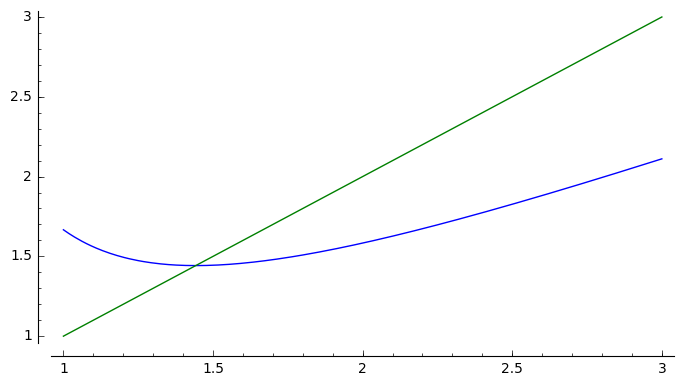

In [223]:
g = (2/3)*x + 1/(x^2)
xmin = 1; xmax = 3
a = plot(g, (x, xmin, xmax))
b = plot(x, (x, xmin, xmax), color = 'green')
show(a+b, figsize = [7,4])

In [224]:
# from above
approx=1.5; eps=10^(-15); Nmax=10
fixedpt(g, approx, eps, Nmax)

[[1.50000000000000,
  1.44444444444444,
  1.44225290379137,
  1.44224957031511,
  1.44224957030741,
  1.44224957030741],
 1.44224957030741]

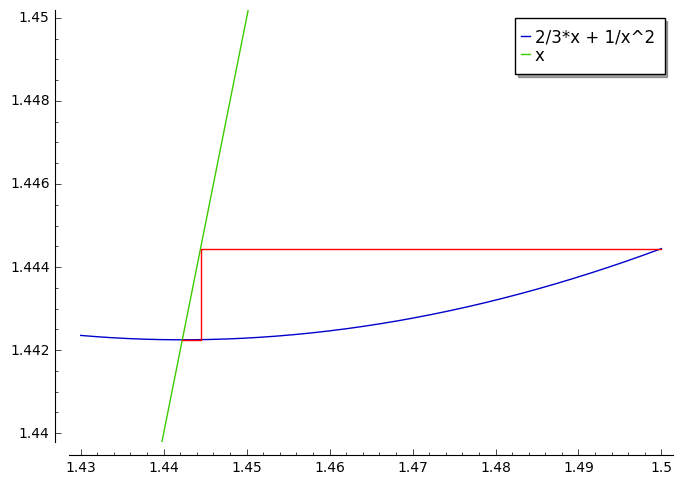

In [225]:
# cobweb from above
seq = fixedpt(g, approx, eps, Nmax)[0]
points = []
for i in range(len(seq)-1):
    points.append((seq[i], seq[i+1]))
    points.append((seq[i+1], seq[i+1]))

h = 0.07
A = plot([g, x], (x, approx-h, approx), ymax = 1.45, ymin =1.44, legend_label = 'automatic')
B = list_plot(points, plotjoined = True, color = 'red')
show(A+B, figsize = [7,5])

In [226]:
# from below
approx=1.3; eps=10^(-15); Nmax=10
fixedpt(g, approx, eps, Nmax)

[[1.30000000000000,
  1.45838264299803,
  1.44242738117535,
  1.44224959222560,
  1.44224957030741,
  1.44224957030741],
 1.44224957030741]

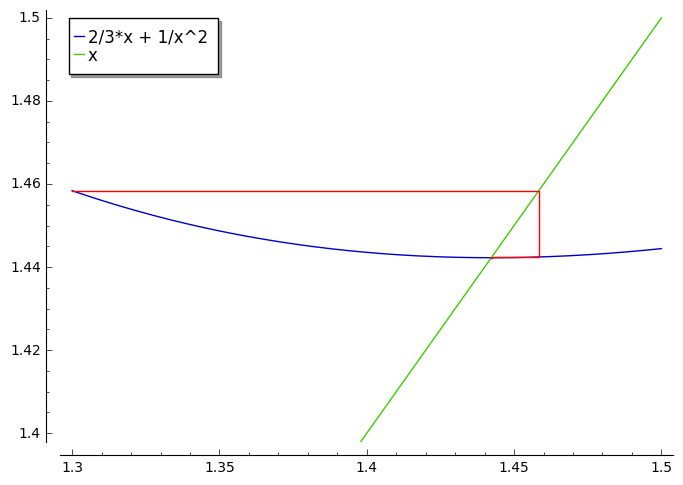

In [227]:
# cobweb from below
seq = fixedpt(g, approx, eps, Nmax)[0]
points = []
for i in range(len(seq)-1):
    points.append((seq[i], seq[i+1]))
    points.append((seq[i+1], seq[i+1]))

A = plot([g, x], xmin=1.3, xmax=1.5, ymin=1.4, ymax=1.5, legend_label = 'automatic')
B = list_plot(points, plotjoined = True, color = 'red')
show(A+B, figsize = [7,5])

In this case $g^{\prime}(\alpha)=0$, so we'll try expanding $g(x)$ in a Taylor
polynomial about $x=\alpha$ to determine the order of convergence. 

In [228]:
show(g.taylor(x, 3^(1/3), 4))

5/9*(x - 3^(1/3))^4 - 4/9*3^(1/3)*(x - 3^(1/3))^3 + 1/3*3^(2/3)*(x - 3^(1/3))^2 + 3^(1/3)

As the smallest non-zero power of $g$'s Taylor series representation is $2$, 
we ought to suspect the order of convergence is $2$. 

To numerically confirm this intuition, consider $$r \approx \frac{\ln{E_n}}{\ln{E_{n-1}}},$$ where $E_n = |x_n - \alpha| \approx |x_n - x_{n+1}|$.

In [229]:
# we find r approximated at different steps n
rate_approx = []
for n in [1..len(seq)-2]:
    rate_approx.append(log(abs(seq[n]-seq[n+1]))/log(abs(seq[n-1]-seq[n])))
    
rate_approx

[2.24554929318992, 2.08675279479323, 2.04240018648047, 2.00445730406457]

Aside: is the asymptotic error constant given by $C = g''(3^{1/3}) \approx 1.386$? No.

In [230]:
N(g.diff(x,2)(x=3^(1/3)))

1.38672254870127

Why not? Consider a set of starting points for the fixed point iteration scheme
$$ \texttt{starts} = \{1.1, 1.2, 1.3, 1.4, 1.5, 1.6\} $$
and look at the sequences of values generated.

In [231]:
# halting parameters
eps=10^(-20); Nmax=10

# starting points
starts = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6]

# sequences generated from starting points
seqs = []
for start in starts:
    seqs.append(fixedpt(g, start, eps, Nmax)[0])

Aside: is the order of this method $r = 2$?

By definition, a sequence ${x_n}$ converges to $\alpha$ of *order* $r$ with asymptotic error constant $C$ iff 
$$ \lim_{n\to\infty} \frac{|x_n - \alpha|}{|x_{n-1} - \alpha|^r} = C.$$

We'll estimate $C$ by evaluating the ratio $|x_{n+1} - x_n|:|x_{n} - x_{n-1}|^r$ for all $n$ in $\{0,1,2,3,4\}$.

In [234]:
r = 2

for i in range(len(seqs)):
    print("starting at " + str(N(starts[i], digits = 2)))
    for n in range(5):
        print("E_"+str(n+1)+":(E_"+str(n)+")^"+str(r)+" ~ "+str(abs(seqs[i][n+1]-seqs[i][n])/abs(seqs[i][n]-seqs[i][n-1])^r))
    print("")

starting at 1.1
E_1:(E_0)^2 ~ 3.92521896530955
E_2:(E_1)^2 ~ 0.515127403734279
E_3:(E_2)^2 ~ 0.723722620291041
E_4:(E_3)^2 ~ 0.696087035559723
E_5:(E_4)^2 ~ 0.693377765497636

starting at 1.2
E_1:(E_0)^2 ~ 5.01738392104314
E_2:(E_1)^2 ~ 0.581252332057324
E_3:(E_2)^2 ~ 0.708606891994268
E_4:(E_3)^2 ~ 0.693936927079967
E_5:(E_4)^2 ~ 0.693356049491765

starting at 1.3
E_1:(E_0)^2 ~ 7.82718609595824
E_2:(E_1)^2 ~ 0.636046348028419
E_3:(E_2)^2 ~ 0.698388201565812
E_4:(E_3)^2 ~ 0.693418242131110
E_5:(E_4)^2 ~ 0.924401492637500

starting at 1.4
E_1:(E_0)^2 ~ 24.3903507867735
E_2:(E_1)^2 ~ 0.678813844638179
E_3:(E_2)^2 ~ 0.693773107480024
E_4:(E_3)^2 ~ 0.693423633803438
E_5:(E_4)^2 ~ 0.000000000000000

starting at 1.5
E_1:(E_0)^2 ~ 16.6577774285817
E_2:(E_1)^2 ~ 0.710059171597676
E_3:(E_2)^2 ~ 0.694062057080989
E_4:(E_3)^2 ~ 0.693365858877836
E_5:(E_4)^2 ~ 0.000000000000000

starting at 1.6
E_1:(E_0)^2 ~ 5.73466736902171
E_2:(E_1)^2 ~ 0.731003100856789
E_3:(E_2)^2 ~ 0.698057272096944
E_4:(E_3)

Notice the ratios do not seem to converge. I'll retract the hypothesis that $r=2$. Let's firm up definition of asymptotic error constant, by varying $r$ and while looking for convergent values $C$.

For example, plotting $r$ against $\sigma^2_C$ (the standard deviation of the `E_4:(E_3)^r`'s generated above), we find:

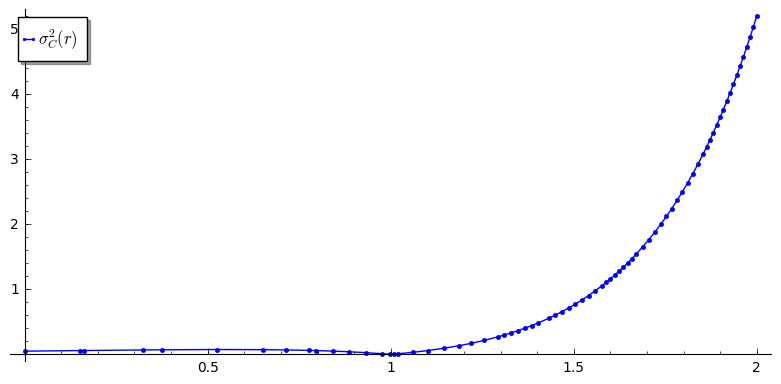

In [221]:
def std_C(r):
    return std([abs(seqs[i][3+1]-seqs[i][3])/abs(seqs[i][3]-seqs[i][3-1])^r for i in range(len(starts))])

var('r')
plot(std_C(r), (r,0,2), plot_points=20, 
     marker='.', legend_label= '$\\sigma^2_C(r)$',
     figsize = [8,4])

While varying $r$, we find that the approximate $C$ have *no deviation* about $r=1$. As we need our iterative scheme to converge upon an asymptotic error constant, we therefore suspect $r=1$.

TODO: find $r$ and $C$ rigorously.

### prob 2 (c)

Lastly, consider (to find the fixed point $\alpha=3$)
$$x_{n+1}=\frac{12}{1+x_n}, $$

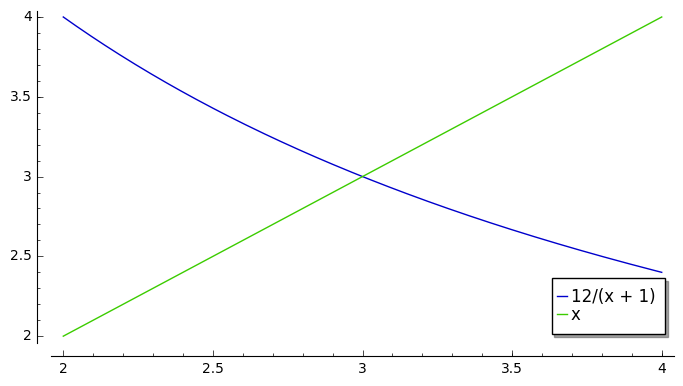

In [237]:
g = 12/(1+x)
xmin = 2; xmax = 4
plot([g,x], (x, xmin, xmax), legend_label = 'automatic', figsize=[7,4])

In [238]:
# notice the derivative at x = 3 is small enough, and this is likely the asymptotic error constant
abs(g.diff(x,1)(x=3))

3/4

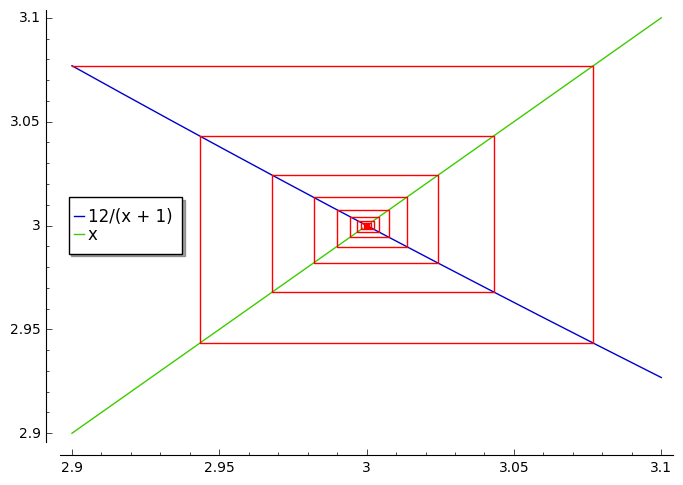

In [239]:
# cobweb diagram from starting point 2.9
approx=2.9; eps=10^(-15); Nmax=20
seq = fixedpt(g, approx, eps, Nmax)[0]
points = []
for i in range(len(seq)-1):
    points.append((seq[i], seq[i+1]))
    points.append((seq[i+1], seq[i+1]))

# draw the figure
h = 0.1
A = plot([g, x], xmin=3-h, xmax=3+h, ymin=3-h, ymax=3+h, legend_label = 'automatic')
B = list_plot(points, plotjoined = True, color = 'red')
show(A+B, figsize = [7,5])

In [243]:
# halting parameters
eps=10^(-20); Nmax=20

# starting points
starts = [2.9, 2.95, 2.99, 3.01, 3.05, 3.1]

# sequences generated from starting points
seqs = []
for start in starts:
    seqs.append(fixedpt(g, start, eps, Nmax)[0])

Again, I'm not sure how to determine the order of convergence $r$. 
Theoretically, I'm led to believe that $r = 1$ and
the asymptotic error constant $C$ is bounded by 

$$ C \leq \max_{\substack{x \in [2.8,3.2]}}|g'(x)| $$

We can verify this hunch by comparing the numerically determined asymptotic constants to the maximum slope on the interval $[2.8,3.2]$.

In [250]:
# numerically determined C from differnt starting points
r = 1
[abs(seqs[i][10+1]-seqs[i][10])/abs(seqs[i][10]-seqs[i][10-1])^r for i in range(len(starts))]

[0.749642720979530,
 0.749822700352781,
 0.749964751571779,
 0.750035143620742,
 0.750174679326877,
 0.750346795995921]

In [251]:
# max slope on [2.8,3.2]
max([abs(g.diff(x,1)(x=start)) for start in starts])

0.788954635108481

### prob 3

Let $\alpha$ be a fixed point of $g(x)$. 
Consider the fixed-point iteration $x_{n+1}
=g(x_n)$ and suppose that $\max |g'(x)|=k<1$. 

I claim $$|\alpha-x_{n+1}|\le {k\over {1-k}}|x_{n+1}-x_n|.$$

*Proof*.
